# Swish: A Self-Gated Activation Function

## Proposed Benefits
* Unbounded above
    * Good because it avoids saturation, i.e. gradients going to zero. 
* Bounded below
    * Good because of regularizing effects where large negative inputs are "forgotten". Important in start of training.
    * Relu and softplus also has this effect but Swish gives small negative output for small negative input also.
* Non-monotonic (goes down a bit around 0)
    * Good because see above.
    * Also increases expressivity and gradient flow. Many preactivations are in this range.
* Smooth
    * Generally easier to optimize.

TODO: weight inits, use same as for relu? arent some of them designed with relu in mind?

## Usage notes
* If used with batchnorm, the scale parameter of batchnorm $\gamma$ must be used.
    * e.g. ```tf.layers.batch_normalization(..., scale=True, ...)```

## Questions
* Are the 2d smoothness plots enough to say that it's likely easier to optimize?

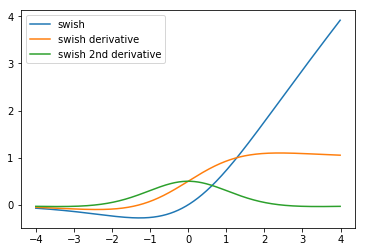

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1. / (1. + np.exp(-x))

def swish(x):
    return x * sigmoid(x)

def swish_derivative(x):
    fx = swish(x)
    return fx + sigmoid(x) * (1. - fx)

def swish_second_derivative(x):
    # Non simplified.
    sigma_x = sigmoid(x)
    fx = swish(x)
    dfx = swish_derivative(x)
    return dfx + sigma_x * (1. - sigma_x) * (1. - fx) + sigmoid(x) * (-dfx)

x = np.arange(-4., 4., 0.01)
y = swish(x)
dx = swish_derivative(x)
dxdx = swish_second_derivative(x)

plt.plot(x, y, label="swish")
plt.plot(x, dx, label="swish derivative")
plt.plot(x, dxdx, label="swish 2nd derivative")
plt.legend()
plt.show()

## Experiments
* Improve training on deep networks.
    * asda
* Benchmarks vs other activation functions.
    * CIFAR-10
    * ImageNet
    * Machine Translation

## Discussion
* Interesting experiment?:
    * Choose some tasks.
    * Use an mlp $\mathcal{R}^1 \rightarrow \mathcal{R}^1$ as activation function for some model. Share weights of this mlp for all places this activation function is used.
    * Train the whole thing, i.e. weights of both the actual model as well as weights of mlp parametrized activation function.
    * See if it approaches same form for many tasks, could give insight in what is the "best" activation function.
    
* People on twitter doesn't seem to agree that Swish would be better than just ReLU or something else. In fact it often seems worse. TODO: Links